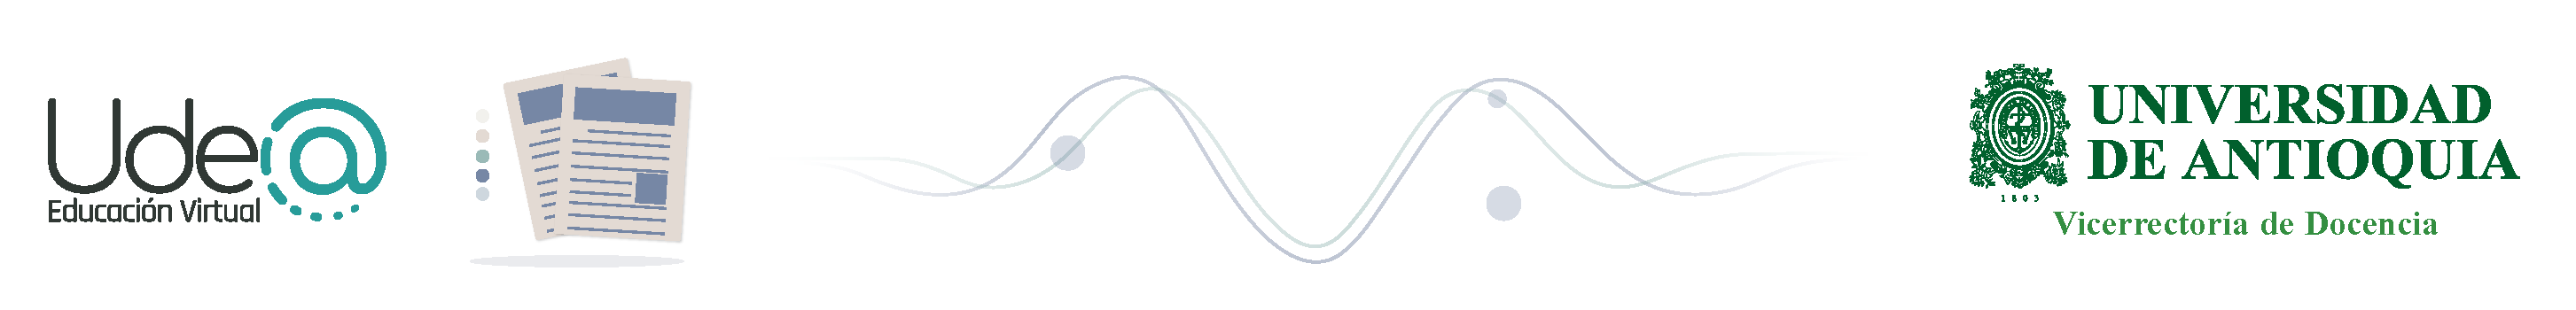

# Miniproject 2: Face Recognition sistems
### Classify _Labeled Faces in the Wild (LFW) people dataset_ with Convolutional Neural Networks, Support Vector Machines and Deep Neural Networks

##### University of Antioquia
##### Faculty of Engineering
##### Department of Electronical & Telecommunications Engineering
##### October 2022

**Signal Processing for Machine Learning** 

**Professor:** Hernán Felipe García Arias

**Developers:**
- Camilo Hernández Ruiz
- Yan Sebastian Hoyos Cataño

# 1. Load and process the dataset

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
print(f'Target names: {lfw_people.target_names}')
data = lfw_people.data
target = lfw_people.target
print(f'''Dimensions: 
      Data.shape = ({data.shape[0]},{lfw_people.images[0].shape[0]}*{lfw_people.images[0].shape[1]}) = {data.shape})
      Target.shape = {target.shape}''')

Target names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
Dimensions: 
      Data.shape = (1288,50*37) = (1288, 1850))
      Target.shape = (1288,)


Dimensions of the image 1100: (50, 37)


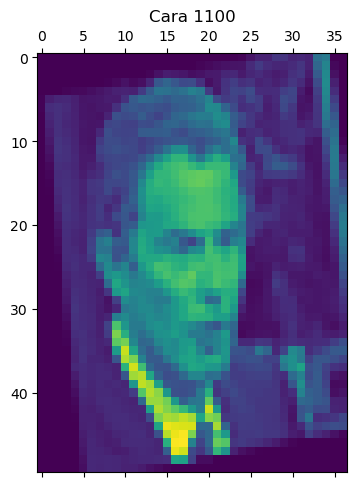

In [4]:
import matplotlib.pyplot as plt
i=1100
print(f'Dimensions of the image {i}: {lfw_people.images[i].shape}')
plt.matshow(lfw_people.images[i])
plt.title(f"Cara {i}")
plt.show()

First, we split up the data.

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=0)

Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. Here is a simple example of scaling the data using the standard deviation with StandardScaler.

```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Don't cheat - fit only on training data
X_train = sc.fit_transform(x_train)
# apply same transformation to test data
X_test = sc.transform(x_test)
```

However, the _Labeled Faces in the Wild (LFW) people dataset_ already has scaled values in range [0, 1]. Therefore, scaling the data is not necessary.

# 2. Convolutional Neural Network

First let's install TensorFlow and import Tensorflow.

# Parte de Yan (PCA + SVM & PCA + DNN)

Yan recuerda seguir con la correcta enumeración. Por cada título de nivel 1 (#) agregas un numeral

# Principal Component Analysis (PCA)
A PCA transformation has been made to reduce the number of dimensions of the dataset

In [6]:
def addtext(x, y, percentage, box_color):
    """Add text at a given position of the bar/stem plot

    Args:
        x (float): x coordinate of the point
        y (float): y coordinate of the point
        percentage (float): percentage of the y coordinate given in range [0,1]
        box_color (str): color of the bar/stem plot
        
    Returns:
        None
    """
    for i in range(len(x)):
        plt.text(i, y[i]*percentage, y[i], ha='center',
                 bbox=dict(facecolor=box_color, alpha=0.4))

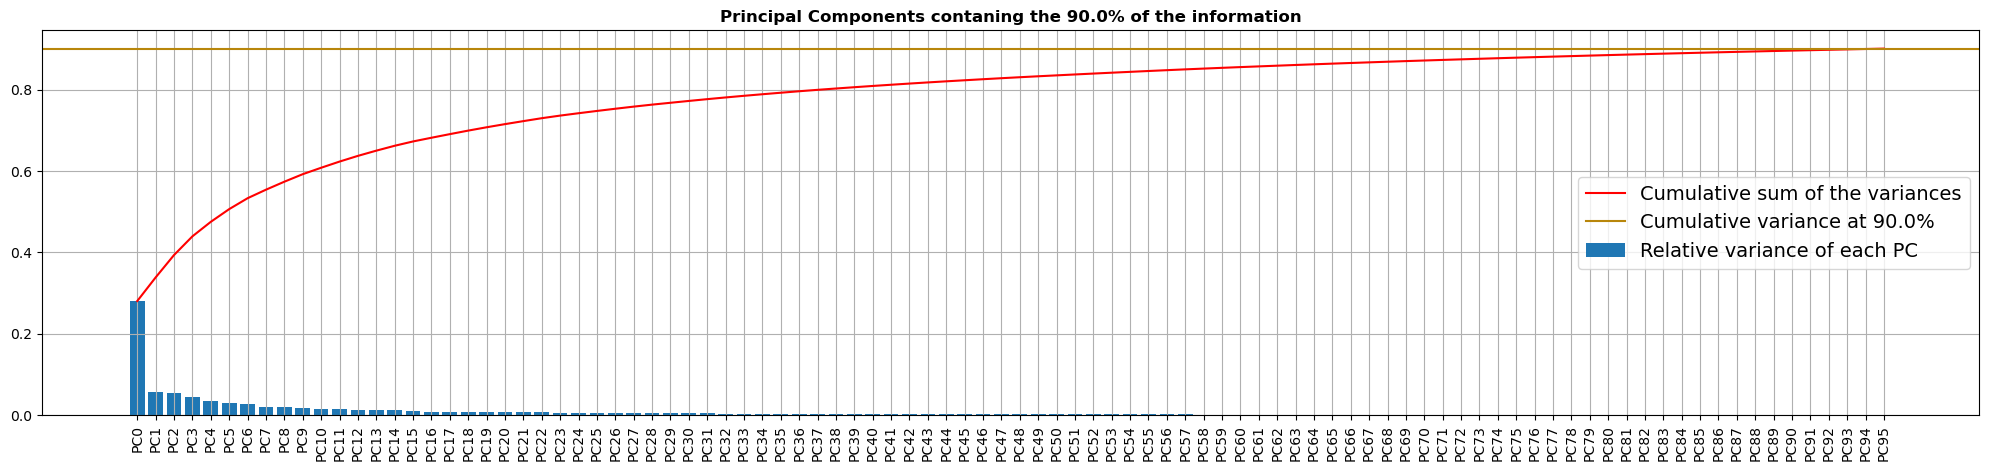

In [12]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(0.9).fit(x_train)  # fitted model declaration
X_train_pca = pca.transform(x_train) # train data in latent space
ncomp = X_train_pca.shape[1] # 112 # number of components_
PCAcolumns = [f'PC{i}' for i in range(ncomp)]  # names of PCA columns
fig_size=(25,5) # fig size for plotting
variance_threshold = 0.9

# Plot of the relative variance of the PCA components
plt.figure(figsize=fig_size)
plt.plot(np.cumsum(pca.explained_variance_ratio_[:ncomp]),'r',label='Cumulative sum of the variances')
plt.bar(PCAcolumns, abs(pca.explained_variance_ratio_[:ncomp]),label='Relative variance of each PC')
plt.xticks(rotation='vertical')
plt.axhline(variance_threshold, c='darkgoldenrod',label=f'Cumulative variance at {variance_threshold*100}%')
# addtext(PCAcolumns, abs(pca.explained_variance_ratio_[:ncomp].round(3)) , .5, 'yellow')
# addtext(PCAcolumns, abs(np.cumsum(pca.explained_variance_ratio_[:ncomp]).round(3)) , 1, 'pink')
plt.legend(loc='center right', fontsize=14)
plt.title(f'Principal Components contaning the {variance_threshold*100}% of the information', fontweight="bold")
plt.grid(True)
plt.show()

Since PC0 explains most of the variance in the training dataset, its eigenvalues represents the most significant importance of every single feature in the training dataset.

Then, if we wanted to use the original features, we could use PC0 to select the most significant features according to these eigenvalues, also called importance coefficients.

Here's an example of using a variance threshold to select the most important features.

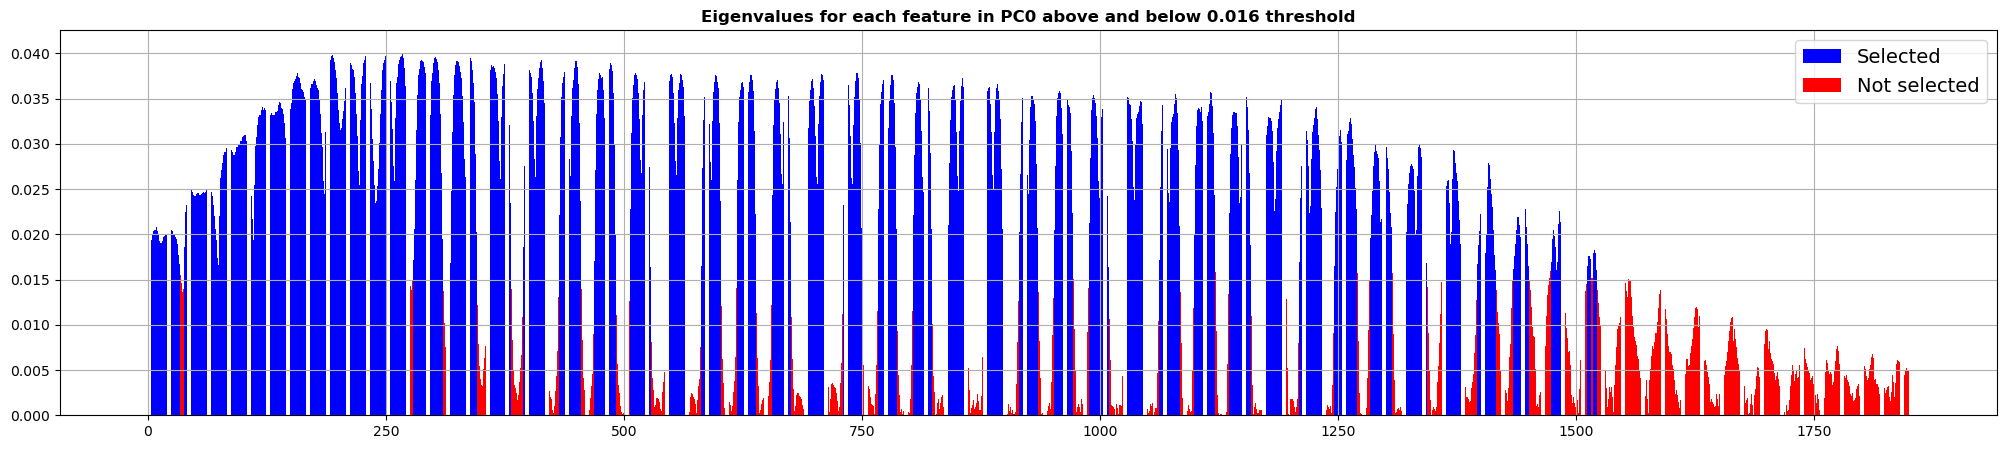

In [14]:
# Importance coefficients plot for each feature in PC0
feature_threshold = 0.016
selected_features = abs(pca.components_[0][np.where(pca.components_[0]>feature_threshold)])
not_selected_features = abs(pca.components_[0][np.where(pca.components_[0]<=feature_threshold)])
index_sel_features = np.where(pca.components_[0]>feature_threshold)[0]
index_not_sel_features = np.where(pca.components_[0]<=feature_threshold)[0]
plt.figure(figsize=fig_size)
plt.bar(index_sel_features,selected_features,color='blue', label='Selected')
plt.bar(index_not_sel_features,not_selected_features,color='r', label='Not selected')
plt.legend(fontsize=14)
#addtext(range(X.shape[1]),abs(pca.components_[0]).round(3), 2, 'yellow')
plt.title(f'Eigenvalues for each feature in PC0 above and below {feature_threshold} threshold', fontweight="bold")
plt.grid(True)
plt.show()

Now we apply the PCA transformation to the testing data and thus obtain the definitive training and testing input sets.

In [9]:
X_test_pca = pca.transform(x_test)

At this point, the respective dimensions of the different sets are:
- **Original data** -> (1288, 1850)
- **Training and testing sets:** *x_train & x_test* -> (1030, 1850) & (258, 1850)
- **Scaled Training and testing sets:** *X_train & X_test* -> (1030, 1850) & (258, 1850)
- **PCA transformed Training and testing sets:** *X_train_pca & X_test_pca* -> (1030, 112) & (258, 112)

Usages:
- _(X_train_pca, y_train)_ to train the models
- _(X_test_pca, y_test)_ to test the models

## SVM

## Deep Learning

Tal vez esto te sirva, Yan
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
Es parecido a lo utilizado por el profe en la clase de 08/30 en _visualizacionPesos_NN.ipynb_

In [10]:
lfw_people

{'data': array([[0.        , 0.        , 0.        , ..., 0.        , 0.00130719,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.13202615, 0.01699346,
         0.        ],
        [0.44575164, 0.4143791 , 0.36993465, ..., 0.71503264, 0.16470589,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.11503268, 0.03921569,
         0.        ],
        [0.        , 0.        , 0.00130719, ..., 0.12810458, 0.13202615,
         0.12941177],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 'images': array([[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.01176471,
          0.        , 0.        ],
         [0.6       , 0.6       , 0.6       , ..., 0.02745098,
          0.        , 0.        ],
         ...,
         [0.17777778, 0.22745098, 0.35424837, ..., 0.12287582,
     

In [11]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

NameError: name 'dataset' is not defined

# Observations

- La cantidad de componentes extraídos con PCA al 90% de la varianza es de 112 mientras que la cantidad de característica en el espacio de entrada es de 50*37 = 1850. Se redujeron en 94% la cantidad neta de características.

# Conclusions

